
#  QQ plots for Treatmnent


##  Req

#### Import Requirements

##### HTML formatting

In [1]:
from IPython.display import HTML

HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
  }
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
  }
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
    line-height: normal;
  }
</style>
""")


HTML("""<style type="text/css">
  table.dataframe td, table.dataframe th {
    max-width: none;
    white-space: normal;
    line-height: normal;
    padding: 0.3em 0.5em;
  }
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

from scipy.stats import *
import scikit_posthocs as sp
from pingouin import friedman




data = pd.read_csv("./NewCols.csv")



## Calculating the differences between the noremalized values. 

In [3]:
data_control = data[data["treatment"] == "baseline"]
data_treatment = data[data["treatment"] == "intravenous LPS"]
procData = data_treatment


procData['diff_AVAR2'] = (
    np.array(data_treatment["AVAR2"]) - np.array(data_control["AVAR2"])).tolist()
procData["diff_CVAR2"] = (
    np.array(data_treatment["CVAR2"]) - np.array(data_control["CVAR2"])).tolist()
procData["diff_AWT2"] = (np.array(data_treatment["AWT2"]) -
                         np.array(data_control["AWT2"])).tolist()
procData["diff_CWT2"] = (np.array(data_treatment["CWT2"]) -
                         np.array(data_control["CWT2"])).tolist()


procData["diff_total2"] = (
    np.array(data_control["total2"]) - np.array(data_treatment["total2"])).tolist()
procData["diff_totalA"] = (
    np.array(data_treatment["totalA"]) - np.array(data_control["totalA"])).tolist()
procData["diff_totalC"] = (
    np.array(data_treatment["totalC"]) - np.array(data_control["totalC"])).tolist()
procData["diff_totalWT"] = (np.array(
    data_treatment["totalWT"]) - np.array(data_control["totalWT"])).tolist()
procData["diff_totalVar"] = (np.array(
    data_treatment["totalVar"]) - np.array(data_control["totalVar"])).tolist()


<ipython-input-3-981ec0c95d0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procData['diff_AVAR2'] = (
<ipython-input-3-981ec0c95d0b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procData["diff_CVAR2"] = (
<ipython-input-3-981ec0c95d0b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

#### Difference Table


In [4]:

pd.set_option('display.max_rows', procData.shape[0]+1)

diff_data = procData.loc[ :,"diff_AVAR2":"diff_totalVar" ]


In [5]:
diff_data.describe()

,diff_AVAR2,diff_CVAR2,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-0.695333,-0.043333,-0.630667,0.020000,1.349333,-1.326000,-0.023333,-0.610667,-0.738667
std,2.089395,0.144502,0.835357,0.084769,2.165016,2.067199,0.170992,0.762978,2.218925
min,-7.700000,-0.520000,-2.970000,-0.070000,-0.740000,-7.700000,-0.520000,-2.670000,-8.220000
25%,-0.290000,-0.055000,-0.840000,-0.010000,0.160000,-1.705000,-0.080000,-0.870000,-0.270000
50%,0.000000,0.000000,-0.410000,0.000000,0.780000,-0.800000,0.000000,-0.430000,0.000000
75%,0.000000,0.000000,0.000000,0.020000,1.660000,-0.170000,0.045000,0.000000,0.000000
max,0.830000,0.110000,0.080000,0.300000,8.220000,0.830000,0.300000,0.010000,0.740000


In [6]:
diff_data.var()


diff_AVAR2       4.365570
diff_CVAR2       0.020881
diff_AWT2        0.697821
diff_CWT2        0.007186
diff_total2      4.687292
diff_totalA      4.273311
diff_totalC      0.029238
diff_totalWT     0.582135
diff_totalVar    4.923627
dtype: float64

In [7]:
diff_data.std()


diff_AVAR2       2.089395
diff_CVAR2       0.144502
diff_AWT2        0.835357
diff_CWT2        0.084769
diff_total2      2.165016
diff_totalA      2.067199
diff_totalC      0.170992
diff_totalWT     0.762978
diff_totalVar    2.218925
dtype: float64

In [8]:
diff_data.skew()


diff_AVAR2      -3.111514
diff_CVAR2      -2.816163
diff_AWT2       -1.826353
diff_CWT2        2.864955
diff_total2      2.497520
diff_totalA     -2.274328
diff_totalC     -1.420225
diff_totalWT    -1.638127
diff_totalVar   -3.165627
dtype: float64

In [9]:
diff_data.kurtosis().tolist()

[10.264406796877637,
 9.444362749191729,
 3.6982075152203597,
 9.543320897371544,
 7.61247279274705,
 6.469933856117286,
 5.523875299227822,
 2.873242267200818,
 10.564445597026406]

In [10]:
diff_data.kurtosis()

diff_AVAR2       10.264407
diff_CVAR2        9.444363
diff_AWT2         3.698208
diff_CWT2         9.543321
diff_total2       7.612473
diff_totalA       6.469934
diff_totalC       5.523875
diff_totalWT      2.873242
diff_totalVar    10.564446
dtype: float64

## QQ Data for LPS



### summary Statistics 

#### Baseline - summary stats - summary stats

In [11]:
baseline_summary = data_control.loc[:,'AWT2':'total2']

baseline_summary.describe()

,AWT2,AVAR2,CWT2,CVAR2,total2
count,15.000000,15.000000,15.000000,15.000000,15.00000
mean,1.392667,2.772000,0.015333,0.070000,4.25000
std,1.754938,4.442345,0.025317,0.138358,4.01305
min,0.000000,0.000000,0.000000,0.000000,0.54000
25%,0.105000,0.000000,0.000000,0.000000,1.10500
50%,0.970000,0.190000,0.000000,0.020000,2.99000
75%,1.560000,3.595000,0.020000,0.075000,5.84500
max,6.480000,12.310000,0.090000,0.540000,12.85000


#### Variance & STD DEv

In [12]:
baseline_summary.var()

AWT2       3.079807
AVAR2     19.734431
CWT2       0.000641
CVAR2      0.019143
total2    16.104571
dtype: float64

In [13]:
baseline_summary.std()

AWT2      1.754938
AVAR2     4.442345
CWT2      0.025317
CVAR2     0.138358
total2    4.013050
dtype: float64

#### skew

In [14]:
scipy.stats.skew(baseline_summary).tolist()


[1.7972433220325235,
 1.3837254728073076,
 1.887008077175262,
 2.842510792681786,
 1.1172243604148848]

#### Kurtosis

In [15]:
scipy.stats.kurtosis(baseline_summary).tolist()


[2.75752748154149,
 0.35092024370846486,
 3.0210330979027598,
 7.236781577188676,
 0.07325166351934786]

#### Intravenous LPS - summary stats

In [16]:
LPS_summary = data_treatment.loc[:,'AWT2':'total2']
LPS_summary.describe()

,AWT2,AVAR2,CWT2,CVAR2,total2
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.762000,2.076667,0.035333,0.026667,2.900667
std,1.088631,3.780445,0.077355,0.048354,3.529809
min,0.000000,0.000000,0.000000,0.000000,0.230000
25%,0.105000,0.000000,0.000000,0.000000,0.525000
50%,0.280000,0.190000,0.000000,0.000000,1.830000
75%,0.730000,1.955000,0.030000,0.030000,3.345000
max,3.510000,12.950000,0.300000,0.150000,12.950000


#### Variance & STd DEv

In [17]:
LPS_summary.var()


AWT2       1.185117
AVAR2     14.291767
CWT2       0.005984
CVAR2      0.002338
total2    12.459550
dtype: float64

In [18]:
LPS_summary.std()

AWT2      1.088631
AVAR2     3.780445
CWT2      0.077355
CVAR2     0.048354
total2    3.529809
dtype: float64

#### Skew


In [19]:
scipy.stats.skew(LPS_summary)

array([1.63336448, 1.98898714, 2.92934754, 1.83955534, 1.82536955])

#### Kurtosis


In [20]:
scipy.stats.kurtosis(LPS_summary)


array([1.30399526, 2.82979876, 7.53370866, 1.89996101, 2.57492186])

## Graph Data - 

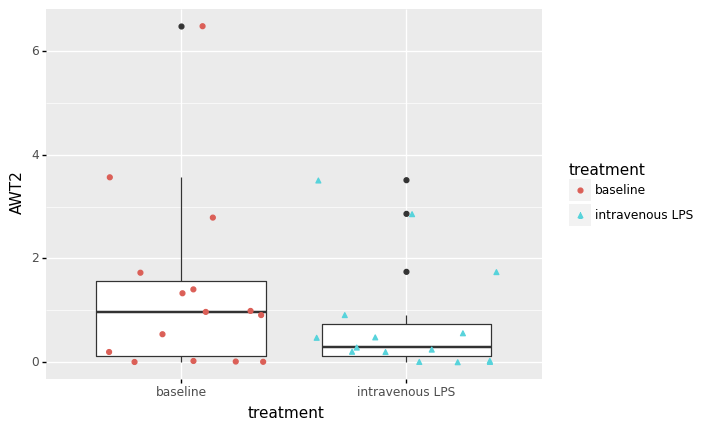

<ggplot: (8789710544219)>

In [21]:
from plotnine import *
ggplot(data, aes(x='treatment', y='AWT2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [22]:
a = 0.05

wilcoxon(data_control["AWT2"],data_treatment["AWT2"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.


WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)

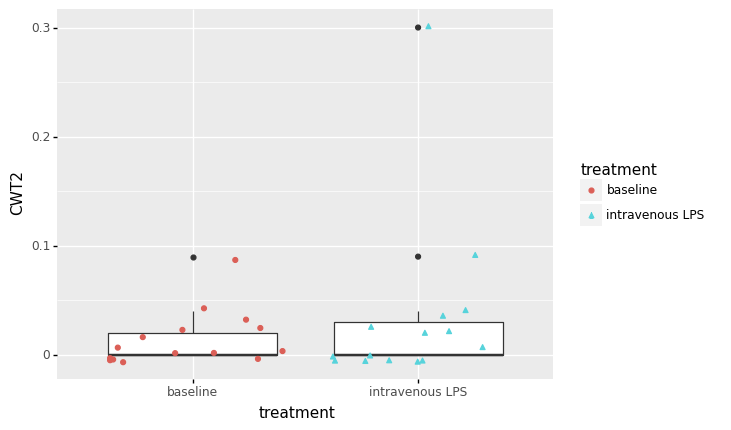

<ggplot: (8789710544357)>

In [23]:
ggplot(data, aes(x='treatment', y='CWT2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [24]:
a = 0.05

wilcoxon(data_control["CWT2"],data_treatment["CWT2"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=19.0, pvalue=0.6729404357300602)

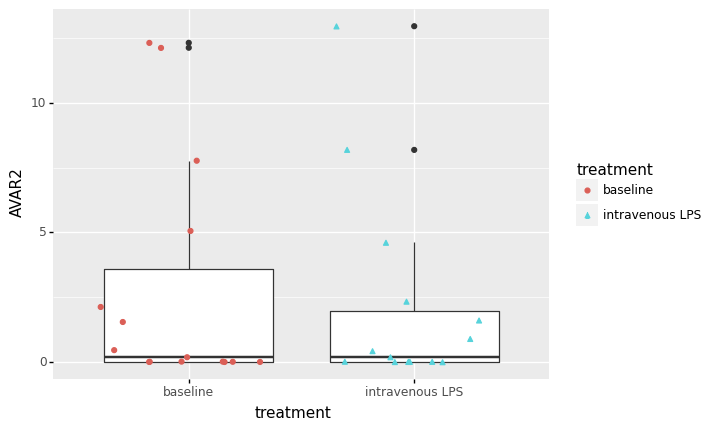

<ggplot: (8789712534405)>

In [25]:
ggplot(data, aes(x='treatment', y='AVAR2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [26]:
a = 0.05

wilcoxon(data_control["AVAR2"],data_treatment["AVAR2"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=7.0, pvalue=0.23672357063785732)

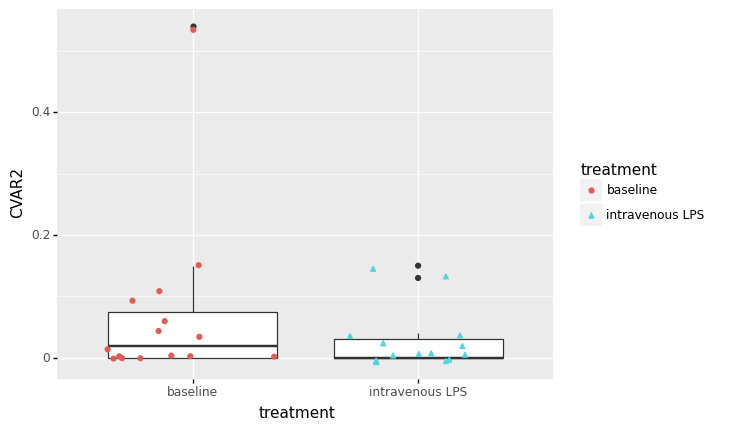

<ggplot: (8789712571582)>

In [27]:
ggplot(data, aes(x='treatment', y='CVAR2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [28]:
a = 0.05

wilcoxon(data_control["CVAR2"],data_treatment["CVAR2"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=10.0, pvalue=0.26144605232963014)

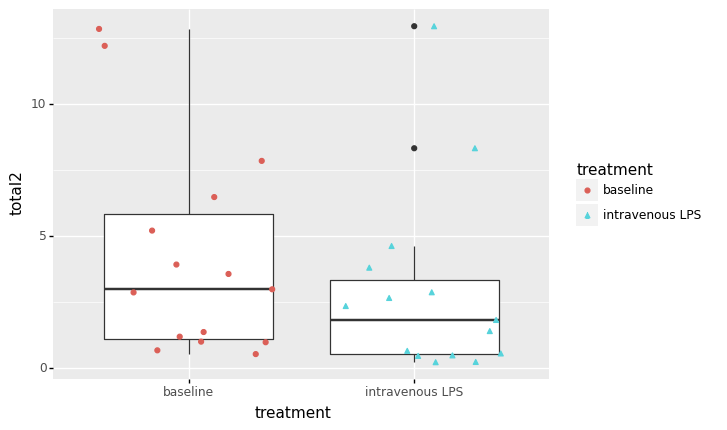

<ggplot: (8789712700880)>

In [29]:
ggplot(data, aes(x='treatment', y='total2') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [30]:
a = 0.05

wilcoxon(diff_data["diff_total2"])


WilcoxonResult(statistic=13.0, pvalue=0.00537109375)

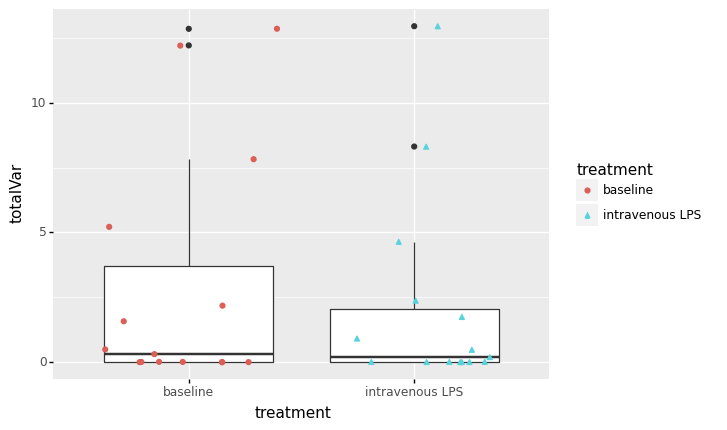

<ggplot: (8789712571426)>

In [31]:
ggplot(data, aes(x='treatment', y='totalVar') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


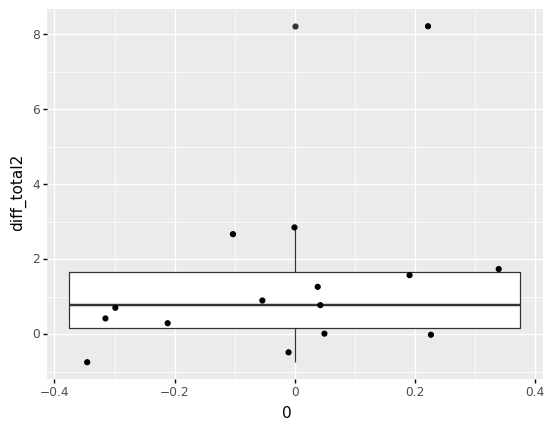

<ggplot: (8789712534390)>

In [32]:
ggplot(diff_data, aes(x=0,y='diff_total2') ) + geom_boxplot() + geom_jitter(diff_data)


In [33]:
data_plot = data_treatment
controlData = data_control['total2']
controlData

0     12.85
1     12.21
2      6.48
3      7.85
4      3.57
5      2.99
6      5.21
7      3.93
8      2.87
9      1.20
10     1.01
11     0.54
12     1.37
13     0.99
14     0.68
Name: total2, dtype: float64

In [34]:
data_plot["ctrl_total2"]=controlData.to_list()
data_plot



<ipython-input-34-e65ed6e0bbb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sheet #,Run,BioSample,Bases,Bytes,Experiment,GEO_Accession,inflammatory_response,race,Sample Name,...,diff_AVAR2,diff_CVAR2,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar,ctrl_total2
15,16,SRR4292097,SAMN05806826,56.30 G,34.32 Gb,SRX2187591,GSM2326902,1,African American,GSM2326902,...,-7.70,-0.52,0.00,0.00,8.22,-7.70,-0.52,0.00,-8.22,12.85
16,17,SRR4292098,SAMN05806825,55.41 G,33.89 Gb,SRX2187592,GSM2326903,1,Caucasian,GSM2326903,...,0.83,-0.09,0.00,0.00,-0.74,0.83,-0.09,0.00,0.74,12.21
17,18,SRR4292099,SAMN05806824,47.95 G,29.16 Gb,SRX2187593,GSM2326904,1,Caucasian,GSM2326904,...,0.00,0.00,-2.97,0.30,2.67,-2.97,0.30,-2.67,0.00,6.48
18,19,SRR4292100,SAMN05806823,47.04 G,28.94 Gb,SRX2187594,GSM2326905,1,Caucasian,GSM2326905,...,0.41,0.07,0.00,0.00,-0.48,0.41,0.07,0.00,0.48,7.85
19,20,SRR4292101,SAMN05806822,25.25 G,16.33 Gb,SRX2187595,GSM2326906,1,Caucasian,GSM2326906,...,0.00,0.00,-1.83,0.09,1.74,-1.83,0.09,-1.74,0.00,3.57
20,21,SRR4292102,SAMN05806821,27.70 G,17.89 Gb,SRX2187596,GSM2326907,1,African American,GSM2326907,...,-0.65,-0.02,-0.93,0.02,1.58,-1.58,0.00,-0.91,-0.67,2.99
21,22,SRR4292103,SAMN05806820,17.58 G,11.40 Gb,SRX2187597,GSM2326908,-1,Caucasian,GSM2326908,...,-2.74,-0.11,0.00,0.00,2.85,-2.74,-0.11,0.00,-2.85,5.21
22,23,SRR4292104,SAMN05806819,25.12 G,16.21 Gb,SRX2187598,GSM2326909,-1,Caucasian,GSM2326909,...,-0.54,0.11,-0.82,-0.02,1.27,-1.36,0.09,-0.84,-0.43,3.93
23,24,SRR4292105,SAMN05806818,26.42 G,17.05 Gb,SRX2187599,GSM2326910,-1,Caucasian,GSM2326910,...,0.00,0.00,0.08,-0.07,-0.01,0.08,-0.07,0.01,0.00,2.87
24,25,SRR4292106,SAMN05806817,9.88 G,5.85 Gb,SRX2187600,GSM2326911,1,Caucasian,GSM2326911,...,0.00,-0.11,-0.62,0.02,0.71,-0.62,-0.09,-0.60,-0.11,1.20


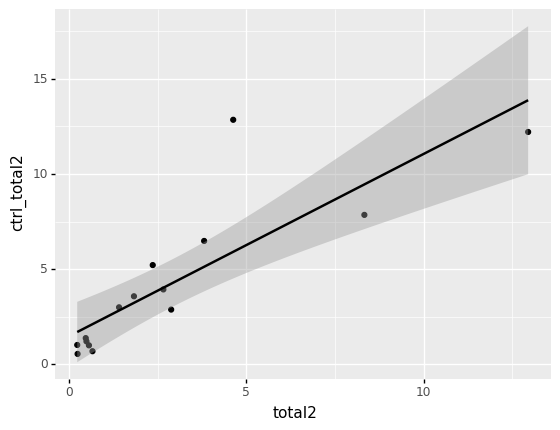

<ggplot: (8789712838081)>

In [35]:

ggplot(data_plot,aes(x='total2',y='ctrl_total2') )  + geom_point() + geom_smooth(method='lm')


In [36]:

from sklearn import linear_model
lm = linear_model.LinearRegression()


In [37]:
shapiro_test = shapiro(data_control['total2'])
shapiro_test

ShapiroResult(statistic=0.8312229514122009, pvalue=0.009520275518298149)

In [38]:
shapiro_test = shapiro(data_treatment['total2'])
shapiro_test

ShapiroResult(statistic=0.747516393661499, pvalue=0.0008409483707509935)

In [39]:
shapiro_test = shapiro(diff_data['diff_total2'])
shapiro_test

ShapiroResult(statistic=0.7386533617973328, pvalue=0.0006647082045674324)

In [40]:
a = 0.05

wilcoxon(diff_data["diff_totalVar"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


WilcoxonResult(statistic=10.0, pvalue=0.2626182904425206)

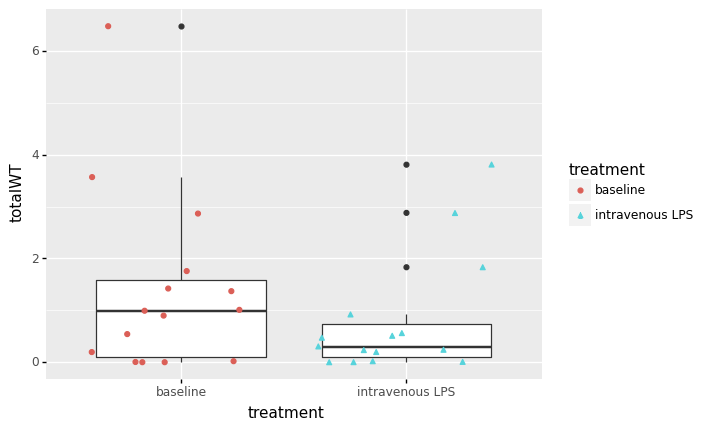

<ggplot: (8789712531264)>

In [41]:
ggplot(data, aes(x='treatment', y='totalWT') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


In [42]:
a = 0.05

wilcoxon(diff_data["diff_totalWT"])


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.


WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)

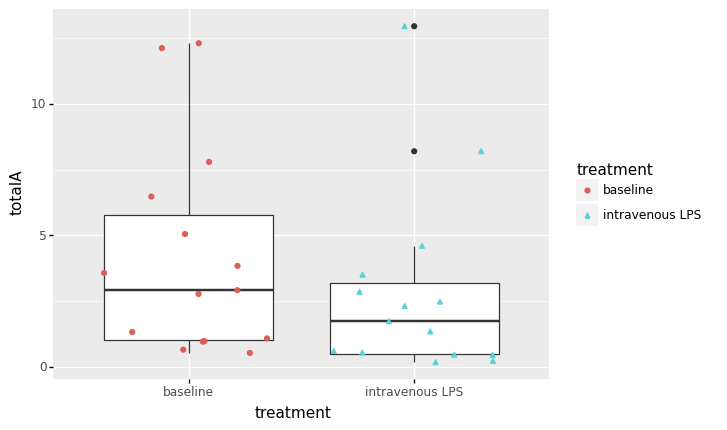

<ggplot: (8789712535327)>

In [43]:
ggplot(data, aes(x='treatment', y='totalA') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


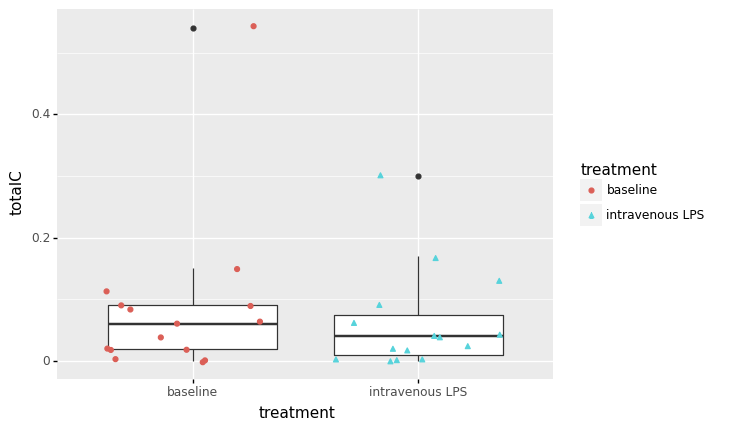

<ggplot: (8789705876128)>

In [44]:
ggplot(data, aes(x='treatment', y='totalC') ) + geom_boxplot() + geom_jitter(data,aes(colour='treatment',shape='treatment'))


## Statistics

### Total 2 Comparison

#### Wilcoxon non-parametric

In [45]:
a = 0.05

w, p = wilcoxon(data_control["total2"],data_treatment["total2"])
print(w, p)

13.0 0.00537109375


In [46]:
if (p < a):
    print("As P"+str(p)+" is less than a: "+str(a))
    print( "we reject the Null Hypothesis.")
    print(". There is significant difference betwween the groups")
else: 
    print("As P"+p+" is larger than a: "+str(a))
    print( "we FAIL TO reject the Null Hypothesis.")
    print(". There is NOT a significant difference betwween the groups")

As P0.00537109375 is less than a: 0.05
we reject the Null Hypothesis.
. There is significant difference betwween the groups


#### Freidman's Anova

In [47]:
sp.posthoc_nemenyi_friedman(diff_data)

,diff_AVAR2,diff_CVAR2,diff_AWT2,diff_CWT2,diff_total2,diff_totalA,diff_totalC,diff_totalWT,diff_totalVar
diff_AVAR2,1.000000,0.900000,0.719090,0.900000,0.385873,0.321768,0.900000,0.759541,0.900000
diff_CVAR2,0.900000,1.000000,0.597725,0.900000,0.516816,0.215913,0.900000,0.638181,0.900000
diff_AWT2,0.719090,0.597725,1.000000,0.363819,0.002710,0.900000,0.557270,0.900000,0.900000
diff_CWT2,0.900000,0.900000,0.363819,1.000000,0.739314,0.088304,0.900000,0.408266,0.900000
diff_total2,0.385873,0.516816,0.002710,0.739314,1.000000,0.001000,0.557270,0.003528,0.215913
diff_totalA,0.321768,0.215913,0.900000,0.088304,0.001000,1.000000,0.186146,0.900000,0.516816
diff_totalC,0.900000,0.900000,0.557270,0.900000,0.557270,0.186146,1.000000,0.597725,0.900000
diff_totalWT,0.759541,0.638181,0.900000,0.408266,0.003528,0.900000,0.597725,1.000000,0.900000
diff_totalVar,0.900000,0.900000,0.900000,0.900000,0.215913,0.516816,0.900000,0.900000,1.000000


Friedman Tes 

### other

In [48]:
a = 0.05

w, p = wilcoxon(data_control["AWT2"],data_treatment["AWT2"])
print(w, p)

1.0 0.0069104298078147995


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.


In [49]:
a = 0.05

w, p = wilcoxon(data_control["CVAR2"],data_treatment["CVAR2"])
print(w, p)

10.0 0.26144605232963014


/opt/anaconda3/envs/fuckMyLife/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.


In [50]:
a = 0.05

w, p = wilcoxon(data_control["AWT2"],data_treatment["CWT2"])
print(w, p)

0.0 0.002217721464237049


In [51]:
a = 0.05

w, p = wilcoxon(data_control["total2"],data_treatment["total2"])
print(w, p)

13.0 0.00537109375


2 graphs 

1. Do the Table
3. Black and white
3. Make sure its not sloppy
4. 

control, LPS & Difference.

correlation plot for each patient - total 2 & diff_total2

Look for A/C ratios 

ggplot(data_plot,aes(x='total2',y='ctrl_total2') )  + geom_point(colour) + geom_smooth(method='lm')
